<a href="https://colab.research.google.com/github/NishchalSingh-Sudo/DataScienceEcosystem/blob/main/WSNFaultDetection(Finalist).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip uninstall qiskit qiskit-aer qiskit-machine-learning qiskit-algorithms qiskit-ibm-runtime -y

In [ ]:
!pip install "qiskit==1.4.2" "qiskit-aer==0.16.3" "qiskit-machine-learning==0.8.2" "qiskit-algorithms==0.3"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.6/231.6 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.6/308.6 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 9.0 MB/s eta 0:00:00


In [ ]:
!pip install qiskit-machine-learning qiskit-ibm-runtime
!pip install scikit-learn matplotlib numpy pandas
!pip install qiskit-aer
!pip install qiskit-algorithms
!pip install qiskit>=1.0
!pip install qiskit-ibm-runtime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.9/363.9 kB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 6.9 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Uninstalling requests-2.32.3:
      Successfully uninstalled requests-2.32.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.3, but you have requests 2.32.4 which is incompatible.


In [ ]:
!pip list | grep qiskit
# Should show:
# qiskit                      1.x.x
# qiskit-machine-learning      0.8.x
# qiskit-ibm-runtime           0.x.x



qiskit                                1.4.2
qiskit-aer                            0.16.3
qiskit-algorithms                     0.3.0
qiskit-ibm-runtime                    0.40.1
qiskit-machine-learning               0.8.2


In [ ]:
# Add this at the top of your code:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)


In [ ]:
!pip install --upgrade qiskit-machine-learning
!pip install qiskit qiskit-aer qiskit-machine-learning qiskit-algorithms --quiet


In [ ]:
import numpy as np
from qiskit_aer import Aer
from qiskit.primitives import StatevectorSampler
from qiskit_algorithms.utils import algorithm_globals
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit.primitives import BackendSampler
from qiskit_machine_learning.utils import algorithm_globals
from qiskit_machine_learning.state_fidelities import ComputeUncompute
from qiskit_machine_learning.algorithms import QSVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from qiskit import transpile
from qiskit import QuantumCircuit

In [ ]:
# Set random seeds for reproducibility
np.random.seed(42)
algorithm_globals.random_seed = 42

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Load the dataset
data = pd.read_csv('WsnData (1).csv')

# Drop irrelevant columns
data = data.drop(columns=["SensorID", "Timestamp"])

# Encode 'SensorType' as numeric
data['SensorType'] = data['SensorType'].astype('category').cat.codes

# Define features and target
features = ['SensorType', 'X', 'Y', 'SensorData', 'BatteryLife', 'Temperature']
X = data[features].values
y = data['IsFaulty'].values

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply PCA for dimensionality reduction (important for quantum models)
pca = PCA(n_components=3)  # You can try 2, 3, or 4 depending on your quantum kernel constraints
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print("Data loading and preprocessing complete!")


Data loading and preprocessing complete!


In [ ]:
from sklearn.utils import resample
import numpy as np

# Combine X and y for resampling
train_combined = np.hstack((X_train_pca, y_train.reshape(-1, 1)))
df_train = pd.DataFrame(train_combined, columns=['PC1', 'PC2', 'PC3', 'label'])

# Separate classes
df_majority = df_train[df_train['label'] == 0]
df_minority = df_train[df_train['label'] == 1]

# Upsample minority
df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=len(df_majority),
                                 random_state=42)

# Combine back
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Shuffle the combined dataset (optional but recommended)
df_upsampled = df_upsampled.sample(frac=1, random_state=42).reset_index(drop=True)

# Extract balanced training features and labels
X_train_pca_bal = df_upsampled[['PC1', 'PC2', 'PC3']].values
y_train_bal = df_upsampled['label'].values

print("Balanced dataset prepared. New shape:", X_train_pca_bal.shape)



Balanced dataset prepared. New shape: (11052, 3)


In [ ]:
# Install or upgrade if needed
# !pip install --upgrade qiskit qiskit-aer qiskit-machine-learning

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.utils import resample

from qiskit.primitives import Sampler
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.utils import algorithm_globals

# Set seeds
np.random.seed(42)
algorithm_globals.random_seed = 42

# Load and preprocess dataset
data = pd.read_csv('WsnData (1).csv')
data = data.drop(columns=["SensorID", "Timestamp"])
data['SensorType'] = data['SensorType'].astype('category').cat.codes

features = ['SensorType', 'X', 'Y', 'SensorData', 'BatteryLife', 'Temperature']
X = data[features].values
y = data['IsFaulty'].values

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# PCA
n_components = 3
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Balance training data using upsampling
train_combined = np.hstack((X_train_pca, y_train.reshape(-1, 1)))
df_train = pd.DataFrame(train_combined, columns=['PC1', 'PC2', 'PC3', 'label'])
df_majority = df_train[df_train['label'] == 0]
df_minority = df_train[df_train['label'] == 1]

df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)
df_upsampled = pd.concat([df_majority, df_minority_upsampled]).sample(frac=1, random_state=42).reset_index(drop=True)

X_train_pca_bal = df_upsampled[['PC1', 'PC2', 'PC3']].values.astype(np.float32)
y_train_bal = df_upsampled['label'].values

# Reduce sizes to save memory
train_sample_size = 500
test_sample_size = 400

X_train_small = X_train_pca_bal[:train_sample_size]
y_train_small = y_train_bal[:train_sample_size]
X_test_small = X_test_pca[:test_sample_size].astype(np.float32)
y_test_small = y_test[:test_sample_size]

# Quantum kernel setup
sampler = Sampler(options={"seed_simulator": 42})
feature_map = ZZFeatureMap(feature_dimension=n_components, reps=1, entanglement='linear')
fidelity = ComputeUncompute(sampler=sampler)
quantum_kernel = FidelityQuantumKernel(feature_map=feature_map, fidelity=fidelity)

print("Computing training kernel matrix...")
kernel_train = quantum_kernel.evaluate(X_train_small)

svc = SVC(kernel='precomputed')
svc.fit(kernel_train, y_train_small)

print("Computing test kernel matrix...")
kernel_test = quantum_kernel.evaluate(X_test_small, X_train_small)
y_pred = svc.predict(kernel_test)

print("Classification Report:")
print(classification_report(y_test_small, y_pred))



Computing training kernel matrix...
Computing test kernel matrix...
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.55      0.63       301
           1       0.24      0.43      0.31        99

    accuracy                           0.52       400
   macro avg       0.49      0.49      0.47       400
weighted avg       0.62      0.52      0.55       400



In [ ]:
# Install (if needed)
# !pip install --upgrade qiskit qiskit-aer qiskit-machine-learning

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.metrics import classification_report

from qiskit.primitives import Sampler
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.utils import algorithm_globals

# Set seeds
np.random.seed(42)
algorithm_globals.random_seed = 42

# Load and preprocess data
data = pd.read_csv("WsnData (1).csv")
data = data.drop(columns=["SensorID", "Timestamp"])
data['SensorType'] = data['SensorType'].astype('category').cat.codes

features = ['SensorType', 'X', 'Y', 'SensorData', 'BatteryLife', 'Temperature']
X = data[features].values
y = data['IsFaulty'].values

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, stratify=y, random_state=42
)

# PCA
n_components = 3
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Balance training data
train_combined = np.hstack((X_train_pca, y_train.reshape(-1, 1)))
df_train = pd.DataFrame(train_combined, columns=['PC1', 'PC2', 'PC3', 'label'])

df_majority = df_train[df_train['label'] == 0]
df_minority = df_train[df_train['label'] == 1]

df_minority_upsampled = resample(
    df_minority,
    replace=True,
    n_samples=len(df_majority),
    random_state=42
)

df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled = df_upsampled.sample(frac=1, random_state=42).reset_index(drop=True)

X_train_bal = df_upsampled[['PC1', 'PC2', 'PC3']].values.astype(np.float32)
y_train_bal = df_upsampled['label'].values

# Reduce sample size to avoid RAM crash
X_train_bal = X_train_bal[:300]
y_train_bal = y_train_bal[:300]
X_test_small = X_test_pca[:100].astype(np.float32)
y_test_small = y_test[:100]

# Quantum kernel setup with ZZFeatureMap
sampler = Sampler(options={"seed_simulator": 42})
feature_map = ZZFeatureMap(feature_dimension=n_components, reps=1, entanglement='linear')
fidelity = ComputeUncompute(sampler=sampler)
quantum_kernel = FidelityQuantumKernel(feature_map=feature_map, fidelity=fidelity)

print("Computing training kernel matrix...")
kernel_train = quantum_kernel.evaluate(X_train_bal)

# Train SVM
svc = SVC(kernel='precomputed')
svc.fit(kernel_train, y_train_bal)

print("Computing test kernel matrix...")
kernel_test = quantum_kernel.evaluate(X_test_small, X_train_bal)
y_pred = svc.predict(kernel_test)

# Results
print("Classification Report:")
print(classification_report(y_test_small, y_pred))


Computing training kernel matrix...
Computing test kernel matrix...
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.41      0.54        82
           1       0.16      0.50      0.24        18

    accuracy                           0.43       100
   macro avg       0.47      0.46      0.39       100
weighted avg       0.68      0.43      0.49       100



In [ ]:
# Step 2: Function to Run QSVM for Given Hyperparameters
# This function applies PCA to reduce the data dimension and builds a quantum feature
# map using ZZFeatureMap. It then creates a quantum kernel and runs the QSVM to obtain
# the testing accuracy.


# Set random seed for reproducibility
algorithm_globals.random_seed = 42

# Initialize backend (QASM simulator)
backend = Aer.get_backend('qasm_simulator')

# Initialize BackendSampler for fidelity computation
sampler = BackendSampler(backend=backend, options={"shots": 1024})

# Initialize fidelity computation using ComputeUncompute with the sampler
fidelity = ComputeUncompute(sampler=sampler)

# Define a quantum feature map
feature_map = ZZFeatureMap(feature_dimension=4, reps=2, entanglement="linear")

# Initialize FidelityQuantumKernel with feature map and fidelity computation
quantum_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map)

# Generate synthetic data for testing
X, y = make_classification(n_samples=100, n_features=4, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Perform PCA to reduce dimensionality (if needed)
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train a classical SVM using the quantum kernel matrix
svc = SVC(kernel=quantum_kernel.evaluate)
svc.fit(X_train_pca, y_train)
accuracy = svc.score(X_test_pca, y_test)

print(f"Testing Accuracy: {accuracy:.4f}")

Testing Accuracy: 0.8000


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from qiskit_aer import Aer
from qiskit.primitives import Sampler
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.utils import algorithm_globals
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

np.random.seed(42)
algorithm_globals.random_seed = 42

# Load and preprocess dataset
data = pd.read_csv('WsnData (1).csv')
data = data.drop(columns=["SensorID", "Timestamp"])
data['SensorType'] = data['SensorType'].astype('category').cat.codes

features = ['SensorType', 'X', 'Y', 'SensorData', 'BatteryLife', 'Temperature']
X = data[features].values
y = data['IsFaulty'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Reduce dataset size for memory reasons
sample_size = 300
X_train = X_train[:sample_size]
y_train = y_train[:sample_size]
X_test = X_test[:sample_size // 3]
y_test = y_test[:sample_size // 3]

# Initialize the sampler and fidelity function once (outside loop)
sampler = Sampler(options={"seed_simulator": 42})
fidelity = ComputeUncompute(sampler=sampler)

def compute_kernel_matrix(kernel, X1, X2):
    n1, n2 = X1.shape[0], X2.shape[0]
    kernel_matrix = np.zeros((n1, n2))
    for i in range(n1):
        kernel_matrix[i, :] = kernel.evaluate(np.array([X1[i]]), X2).flatten()
    return kernel_matrix

# Hyperparameter options
pca_options = [2, 3, 4]
reps_options = [1, 2, 3]
best_score = 0
best_params = {}

print("Starting grid search for hyperparameter optimization...\n")

for pca_components in pca_options:
    for reps in reps_options:
        # Apply PCA
        pca = PCA(n_components=pca_components)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)

        # Setup feature map and kernel
        feature_map = ZZFeatureMap(
            feature_dimension=pca_components,
            reps=reps,
            entanglement="linear"
        )
        quantum_kernel = FidelityQuantumKernel(
            fidelity=fidelity,
            feature_map=feature_map
        )

        # Compute kernel matrices (memory-friendly)
        kernel_train = compute_kernel_matrix(quantum_kernel, X_train_pca, X_train_pca)
        kernel_test = compute_kernel_matrix(quantum_kernel, X_test_pca, X_train_pca)

        # Train SVM on precomputed kernel
        svc = SVC(kernel='precomputed')
        svc.fit(kernel_train, y_train)

        # Predict and evaluate accuracy
        accuracy = svc.score(kernel_test, y_test)
        print(f"PCA Components: {pca_components}, Reps: {reps}, Accuracy: {accuracy:.4f}")

        if accuracy > best_score:
            best_score = accuracy
            best_params = {'pca_components': pca_components, 'reps': reps}
            best_model = svc
            best_kernel_test = kernel_test
            best_y_test = y_test

print("\nBest Hyperparameters:")
print(best_params)
print(f"Best QSVM Testing Accuracy: {best_score:.4f}")

# Calculate and print additional metrics on the best model
y_pred = best_model.predict(best_kernel_test)

precision = precision_score(best_y_test, y_pred)
recall = recall_score(best_y_test, y_pred)
f1 = f1_score(best_y_test, y_pred)

print(f"Accuracy:  {best_score:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")

Starting grid search for hyperparameter optimization...

PCA Components: 2, Reps: 1, Accuracy: 0.7600
PCA Components: 2, Reps: 2, Accuracy: 0.7600
PCA Components: 2, Reps: 3, Accuracy: 0.7600
PCA Components: 3, Reps: 1, Accuracy: 0.7600
PCA Components: 3, Reps: 2, Accuracy: 0.7600
PCA Components: 3, Reps: 3, Accuracy: 0.7600
PCA Components: 4, Reps: 1, Accuracy: 0.7600
PCA Components: 4, Reps: 2, Accuracy: 0.7600
PCA Components: 4, Reps: 3, Accuracy: 0.7600

Best Hyperparameters:
{'pca_components': 2, 'reps': 1}
Best QSVM Testing Accuracy: 0.7600
Accuracy:  0.7600
Precision: 0.0000
Recall:    0.0000
F1-score:  0.0000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from scipy.stats import ttest_rel
import numpy as np

# Assuming 'svc' and 'quantum_kernel' are the trained QSVM model and kernel from the grid search
# and 'X_train_pca', 'X_test_pca', 'y_train', 'y_test' are the PCA-transformed data subsets used for training and testing

# Re-define the kernel computation function if needed (or ensure it's available)
def compute_kernel_matrix(kernel, X1, X2):
    n1, n2 = X1.shape[0], X2.shape[0]
    kernel_matrix = np.zeros((n1, n2))
    for i in range(n1):
        kernel_matrix[i, :] = kernel.evaluate(np.array([X1[i]]), X2).flatten()
    return kernel_matrix

# Compute the kernel matrix for QSVM prediction
# This should be X_test_pca vs X_train_pca because the model was trained on the train/train kernel
kernel_test_qsvm = compute_kernel_matrix(quantum_kernel, X_test_pca, X_train_pca)

# QSVM predictions
y_pred_qsvm = svc.predict(kernel_test_qsvm)

# Classical SVM for comparison
# Ensure the classical SVM is trained on the same PCA data subset as the QSVM's training data
svc_classical = SVC(kernel='rbf', random_state=42)
svc_classical.fit(X_train_pca, y_train)
y_pred_classical = svc_classical.predict(X_test_pca) # Classical SVM predicts on raw PCA features

# Compute accuracy for both
acc_qsvm = accuracy_score(y_test, y_pred_qsvm)
acc_classical = accuracy_score(y_test, y_pred_classical)

# If you use cross-validation or have multiple runs, collect accuracies in lists:
# accs_qsvm = [...]
# accs_classical = [...]

# For demonstration, let's say you have lists of accuracies from cross-validation:
# t_stat, p_value = ttest_rel(accs_qsvm, accs_classical)

# If you just have one test set, you can still report the difference, but for true statistical testing, use cross-validation.

print(f"QSVM Accuracy: {acc_qsvm:.4f}")
print(f"Classical SVM Accuracy: {acc_classical:.4f}")
#print(f"Paired t-test p-value: {p_value:.4f}")

QSVM Accuracy: 0.7600
Classical SVM Accuracy: 0.8600


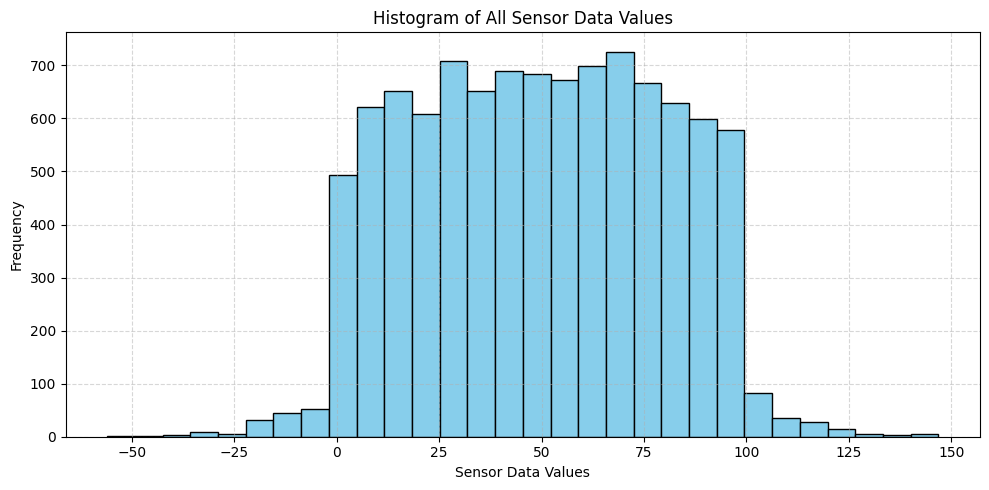

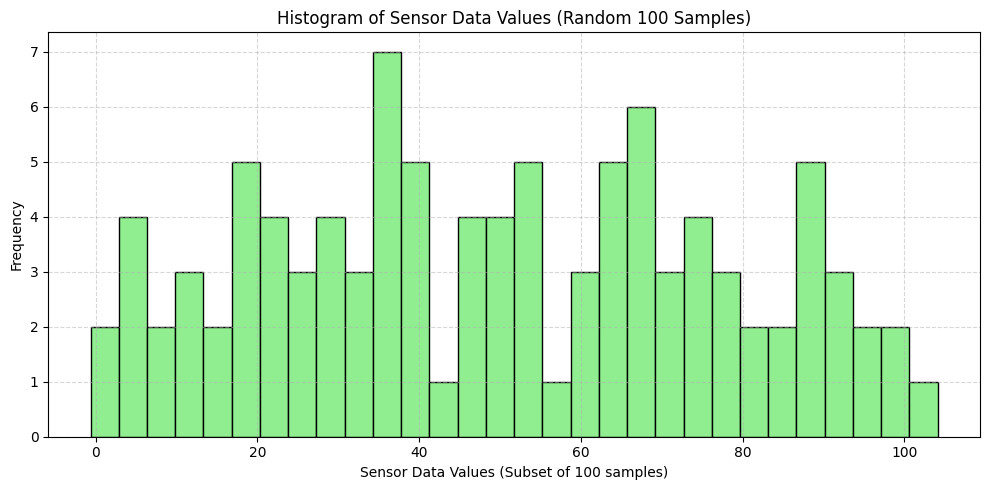

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your full dataset
data = pd.read_csv("WsnData (1).csv")

# 1. Histogram of ALL 'SensorData' values
plt.figure(figsize=(10, 5))
plt.hist(data['SensorData'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Sensor Data Values')
plt.ylabel('Frequency')
plt.title('Histogram of All Sensor Data Values')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 2. Histogram of RANDOM 100 'SensorData' values
# Ensure same features order used in quantum training
X_subset = data.sample(n=100, random_state=42)[['SensorType', 'X', 'Y', 'SensorData', 'BatteryLife', 'Temperature']].values
sensor_data_subset = X_subset[:, 3]  # SensorData is at index 3

plt.figure(figsize=(10, 5))
plt.hist(sensor_data_subset, bins=30, color='lightgreen', edgecolor='black')
plt.xlabel('Sensor Data Values (Subset of 100 samples)')
plt.ylabel('Frequency')
plt.title('Histogram of Sensor Data Values (Random 100 Samples)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


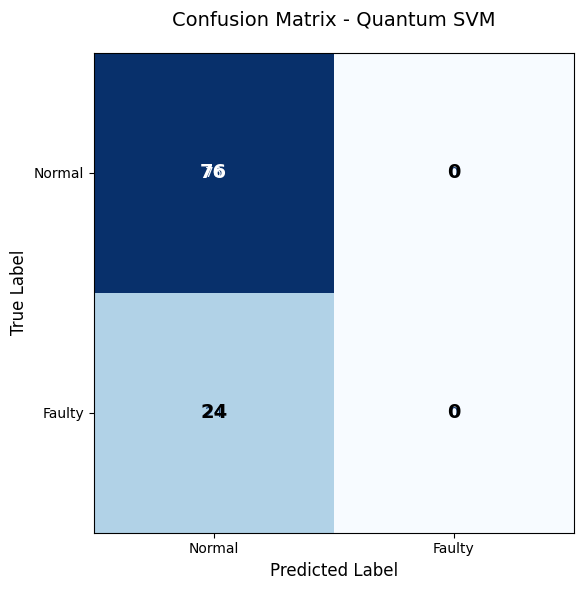

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Recompute the precomputed kernel matrix for prediction
kernel_test = quantum_kernel.evaluate(X_test_pca, X_train_pca)  # test vs. train

# Make predictions
y_pred_qsvm = svc.predict(kernel_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_qsvm, labels=[0, 1])  # 0 = Normal, 1 = Faulty

# Create and customize the display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Faulty"])
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap=plt.cm.Blues, colorbar=False)
plt.title("Confusion Matrix - Quantum SVM", fontsize=14, pad=20)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)

# Annotate values manually for clarity
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha="center", va="center",
                color="white" if cm[i, j] > cm.max() / 2 else "black",
                fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


Prediction Matrix (first 10 rows):
   True Label  Predicted Label
0           0                0
1           0                0
2           0                0
3           1                0
4           0                0
5           0                0
6           0                0
7           1                0
8           0                0
9           0                0


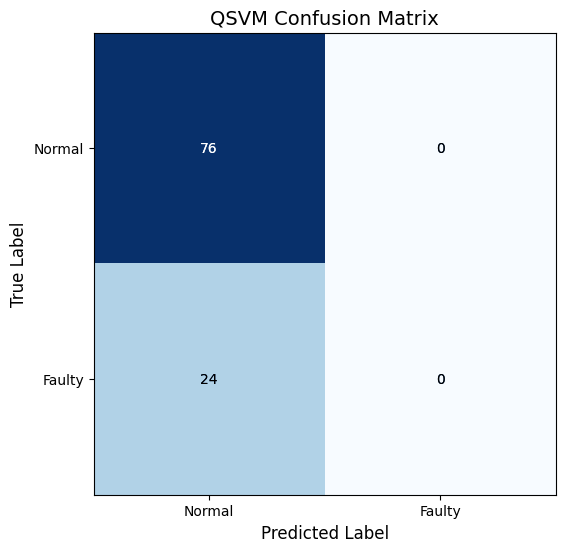

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Evaluate the test kernel matrix using the trained FidelityQuantumKernel
kernel_test = quantum_kernel.evaluate(X_test_pca, X_train_pca)

# Step 2: Make predictions using the trained QSVM model
y_pred_qsvm = svc.predict(kernel_test)

# Step 3: Create a DataFrame to compare true and predicted labels
prediction_matrix = pd.DataFrame({
    'True Label': y_test,
    'Predicted Label': y_pred_qsvm
})

# Step 4: Display the prediction matrix
print("Prediction Matrix (first 10 rows):")
print(prediction_matrix.head(10))

# Step 5: Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred_qsvm, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Faulty"])

fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax, cmap=plt.cm.Blues, colorbar=False)
plt.title("QSVM Confusion Matrix", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)

# Annotate matrix values
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha="center", va="center",
                color="white" if cm[i,j] > cm.max()/2 else "black")

plt.show()

# Optional: Save the predictions to CSV
# prediction_matrix.to_csv("qsvm_predictions.csv", index=False)


In [ ]:
pd.Series(y_train).value_counts()

,count
0,232
1,68


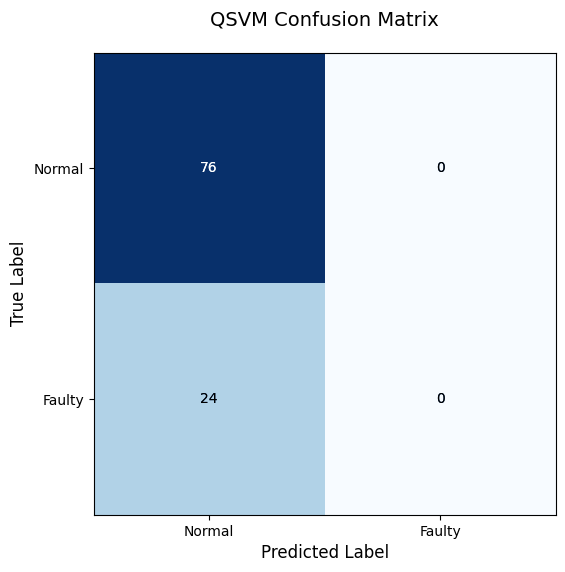

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# After training your QSVM model and making predictions
# Recompute the precomputed kernel matrix for prediction
kernel_test = quantum_kernel.evaluate(X_test_pca, X_train_pca)  # test vs. train

y_pred = svc.predict(kernel_test)  # Use the computed kernel for prediction

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])  # 0=Normal, 1=Faulty

# Create display with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Faulty"])

# Customize plot
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax, cmap=plt.cm.Blues, colorbar=False)
plt.title("QSVM Confusion Matrix", fontsize=14, pad=20)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)

# Add value annotations
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="white" if cm[i,j] > cm.max()/2 else "black")

plt.show()

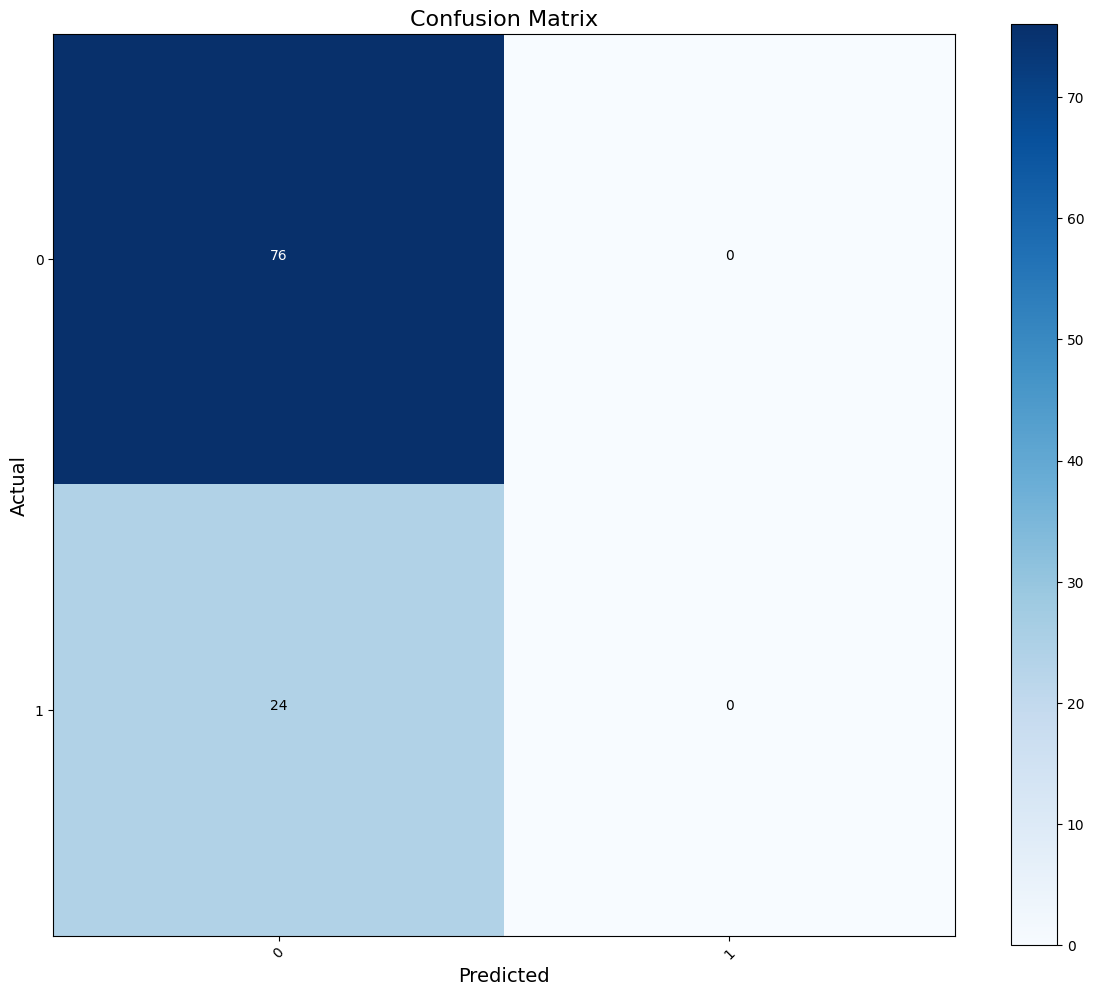

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you already have your QSVM model predictions
# y_test = true labels
# y_pred = QSVM predictions

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(12, 10))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix', fontsize=16)
plt.colorbar()

# Add axis labels
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test), rotation=45)
plt.yticks(tick_marks, np.unique(y_test))
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)

# Add text annotations in cells
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.metrics import classification_report

from qiskit.primitives import Sampler
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.utils import algorithm_globals

# Set random seed for reproducibility
np.random.seed(42)
algorithm_globals.random_seed = 42

# Load and preprocess the dataset
data = pd.read_csv("WsnData (1).csv")
data = data.drop(columns=["SensorID", "Timestamp"])
data['SensorType'] = data['SensorType'].astype('category').cat.codes

# Feature and target selection
features = ['SensorType', 'X', 'Y', 'SensorData', 'BatteryLife', 'Temperature']
X = data[features].values
y = data['IsFaulty'].values

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, stratify=y, random_state=42
)

# Apply PCA
n_components = 3
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Balance the training data via upsampling
train_combined = np.hstack((X_train_pca, y_train.reshape(-1, 1)))
df_train = pd.DataFrame(train_combined, columns=['PC1', 'PC2', 'PC3', 'label'])

df_majority = df_train[df_train['label'] == 0]
df_minority = df_train[df_train['label'] == 1]

df_minority_upsampled = resample(
    df_minority, replace=True, n_samples=len(df_majority), random_state=42
)

df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled = df_upsampled.sample(frac=1, random_state=42).reset_index(drop=True)

X_train_bal = df_upsampled[['PC1', 'PC2', 'PC3']].values.astype(np.float32)
y_train_bal = df_upsampled['label'].values

# Use complete test set
X_test_full = X_test_pca.astype(np.float32)
y_test_full = y_test

# Quantum kernel setup
sampler = Sampler(options={"seed_simulator": 42})
feature_map = ZZFeatureMap(feature_dimension=n_components, reps=1, entanglement='linear')
fidelity = ComputeUncompute(sampler=sampler)
quantum_kernel = FidelityQuantumKernel(feature_map=feature_map, fidelity=fidelity)

# Compute kernel matrices
print("Computing training kernel matrix...")
kernel_train = quantum_kernel.evaluate(X_train_bal)

svc = SVC(kernel='precomputed')
svc.fit(kernel_train, y_train_bal)

print("Computing test kernel matrix...")
kernel_test = quantum_kernel.evaluate(X_test_full, X_train_bal)
y_pred = svc.predict(kernel_test)

# Final performance report
print("Classification Report:")
print(classification_report(y_test_full, y_pred))


Computing training kernel matrix...


KeyboardInterrupt: 